<a href="https://colab.research.google.com/github/SeWonKwon/DeepLearning/blob/main/F02_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
learning_rate = 0.01
training_steps = 1000

In [3]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [4]:
# 변수선언
W = tf.Variable(np.random.randn(), name = 'weight')
b = tf.Variable(np.random.randn(), name= 'bias')

# 식선언
def linear_regression(x):
  return W * x + b

# 로스 펑션
def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

# 옵티마이져
optimizer = tf.optimizers.SGD(learning_rate)

In [5]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)

  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

In [6]:
for step in range(1, training_steps + 1):
  run_optimization()

  if step % 50 == 0 :
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}".format(step, loss, W.numpy(),b.numpy() ))

step:   50	loss: 3.9906	W: 0.5909	b: -1.2741
step:  100	loss: 1.3738	W: 1.4931	b: -0.6128
step:  150	loss: 0.7905	W: 1.8650	b: -0.2347
step:  200	loss: 0.6522	W: 2.0323	b: -0.0377
step:  250	loss: 0.6189	W: 2.1112	b: 0.0615
step:  300	loss: 0.6109	W: 2.1492	b: 0.1107
step:  350	loss: 0.6090	W: 2.1677	b: 0.1350
step:  400	loss: 0.6086	W: 2.1768	b: 0.1469
step:  450	loss: 0.6084	W: 2.1812	b: 0.1528
step:  500	loss: 0.6084	W: 2.1834	b: 0.1557
step:  550	loss: 0.6084	W: 2.1845	b: 0.1571
step:  600	loss: 0.6084	W: 2.1850	b: 0.1578
step:  650	loss: 0.6084	W: 2.1853	b: 0.1581
step:  700	loss: 0.6084	W: 2.1854	b: 0.1583
step:  750	loss: 0.6084	W: 2.1854	b: 0.1584
step:  800	loss: 0.6084	W: 2.1855	b: 0.1584
step:  850	loss: 0.6084	W: 2.1855	b: 0.1584
step:  900	loss: 0.6084	W: 2.1855	b: 0.1584
step:  950	loss: 0.6084	W: 2.1855	b: 0.1584
step: 1000	loss: 0.6084	W: 2.1855	b: 0.1584


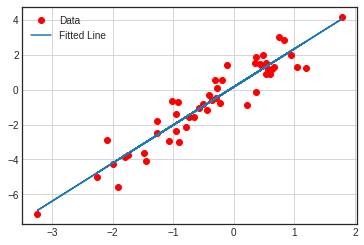

In [12]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W * X + b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [14]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [15]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [34]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [35]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-0.755541
-0.8689512
0.19146264


### 데이터 지정

In [36]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

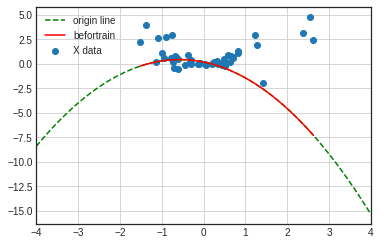

In [37]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a * line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r-', label='befortrain')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

### Util Functions

In [38]:
def compute_loss():
  pred_y = a*(np.array(X)**2) + b*np.array(X) + c
  loss = tf.reduce_mean((Y - pred_y)**2)
  return loss

### Optimizer

In [39]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [40]:
for epoch in range(1, epochs+1, 1):
  optimizer.minimize(compute_loss, var_list=[a, b, c])

  if epoch % 100 ==0:
    print("epoch: {:4d}\ta:{:.4f}\tb:{:.4f}\tc:{:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a:0.6192	b:-0.2954	c:0.3123
epoch:  200	a:0.6884	b:-0.3973	c:0.2323
epoch:  300	a:0.6882	b:-0.3971	c:0.2325
epoch:  400	a:0.6882	b:-0.3971	c:0.2325
epoch:  500	a:0.6882	b:-0.3971	c:0.2325
epoch:  600	a:0.6882	b:-0.3971	c:0.2325
epoch:  700	a:0.6882	b:-0.3971	c:0.2325
epoch:  800	a:0.6882	b:-0.3971	c:0.2325
epoch:  900	a:0.6882	b:-0.3971	c:0.2325
epoch: 1000	a:0.6882	b:-0.3971	c:0.2325


### 학습 후의 회귀선

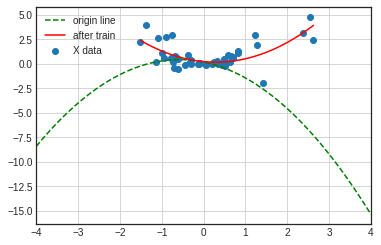

In [41]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a * line_x**2 + b*line_x + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r-', label='after train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [42]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [43]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255. , x_test / 255. 

### tf.data API 사용
- 03 에서 다시 다룸 

In [52]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [53]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

### Util Functions

In [54]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth=num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)

  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y),1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [55]:
optimizer = tf.optimizers.SGD(learning_rate)

In [56]:
def run_optimization(x, y):
  with tf.GradientTape() as tape:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)

  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [57]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  run_optimization(batch_x, batch_y)

  if step % 50 == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print("step: {:4d}\tloss: {:.4f}\taccuracy: {:4f}".format(step, loss, acc))

step:   50	loss: 6.9053	accuracy: 0.250000
step:  100	loss: 4.2041	accuracy: 0.375000
step:  150	loss: 3.5933	accuracy: 0.464844
step:  200	loss: 2.1908	accuracy: 0.585938
step:  250	loss: 2.2052	accuracy: 0.625000
step:  300	loss: 2.0307	accuracy: 0.648438
step:  350	loss: 1.7274	accuracy: 0.671875
step:  400	loss: 1.6291	accuracy: 0.718750
step:  450	loss: 1.4719	accuracy: 0.761719
step:  500	loss: 1.0489	accuracy: 0.777344
step:  550	loss: 1.2460	accuracy: 0.765625
step:  600	loss: 1.1041	accuracy: 0.769531
step:  650	loss: 1.3013	accuracy: 0.710938
step:  700	loss: 0.9622	accuracy: 0.804688
step:  750	loss: 0.8152	accuracy: 0.835938
step:  800	loss: 0.8549	accuracy: 0.796875
step:  850	loss: 1.3004	accuracy: 0.765625
step:  900	loss: 1.0370	accuracy: 0.789062
step:  950	loss: 1.1399	accuracy: 0.781250
step: 1000	loss: 0.9497	accuracy: 0.789062


###  테스트

In [58]:
pred = logistic_regression(x_test)
print("Test Accuracy: {}".format(accuracy(pred, y_test)))

Test Accuracy: 0.8097000122070312


### 시각화

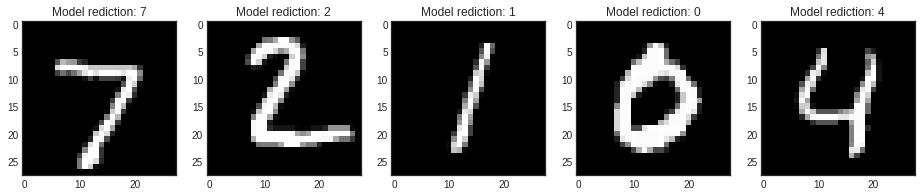

In [62]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(16, 8))
for i in range(1, num_images+1, 1):
  plt.subplot(1, num_images, i)
  plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap='gray')
  plt.title("Model rediction: {}".format(np.argmax(predictions.numpy()[i-1])))

plt.show()